# Diffusion in Thin Foil Targets

## Mathematical Formulation

The diffusion process in the thin foil target is described using **Fick's Second Law of Diffusion**. For a 1-dimensional geometry, it is given by:

$$
\frac{\partial C(x,t)}{\partial t} = D \frac{\partial^2 C(x,t)}{\partial x^2}
$$

dt: 0.001 s


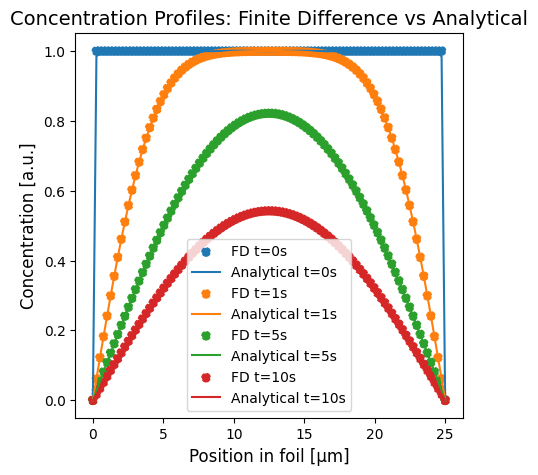

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C0 = 1             # Initial concentration (arbitrary units)
l = 25e-6          # Thickness of the foil (m)
D = 5.4e-12        # Diffusion coefficient (m^2/s)
n_terms = 600      # Number of terms in the Fourier series
t_tot = 10         # Total simulation time [s]
nx = 100           # Number of spatial points
alpha = 0.1        # Stability condition (must be below 0.5)
dx = l / (nx - 1)  # Spatial step size
dt = alpha * dx**2 / D  # Time step [s]
print(f"dt: {dt:.3f} s")
time_steps = int(t_tot / dt)  # Number of time steps

# Spatial grid
x = np.linspace(0, l, nx)

# Initialize arrays for finite difference method
C_fd = np.zeros((time_steps, nx))

# IC
C0_distribution = C0 

C_fd[0, :] = C0_distribution  # Initial condition: Gaussian distribution
C_fd[:, 0] = 0   # Boundary condition at x = 0
C_fd[:, -1] = 0  # Boundary condition at x = l

# Finite difference method loop
for t in range(1, time_steps):
    for i in range(1, nx - 1):
        C_fd[t, i] = C_fd[t - 1, i] + alpha * (C_fd[t - 1, i + 1] - 2 * C_fd[t - 1, i] + C_fd[t - 1, i - 1])

# Analytical solution function
def analytical_concentration(x, t, D, l, C0, n_terms):
    concentration = np.zeros_like(x)
    for n in range(n_terms):
        term = (
            (1 / (2 * n + 1)) *
            np.sin((2 * n + 1) * np.pi * x / l) *
            np.exp(-D * (2 * n + 1)**2 * np.pi**2 / l**2 * t)
        )
        concentration += term
    concentration = (4 * C0 / np.pi) * concentration
    return concentration

# Time points for comparison
comparison_times = [0, 1, 5, 10]  
comparison_indices = [min(int(t / dt), time_steps - 1) for t in comparison_times]

# Plotting
plt.figure(figsize=(5, 5))
for t_idx, t in zip(comparison_indices, comparison_times):
    plt.scatter(x * 1e6, C_fd[t_idx, :], label=f"FD t={t}s", linestyle="--")
    C_analytical = analytical_concentration(x, t, D, l, C0, n_terms)
    plt.plot(x * 1e6, C_analytical, label=f"Analytical t={t}s")

plt.title("Concentration Profiles: Finite Difference vs Analytical", fontsize=14)
plt.xlabel("Position in foil [μm]", fontsize=12)
plt.ylabel("Concentration [a.u.]", fontsize=12)
plt.legend()

plt.show()
